
# Strength movement quality classification




<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Strength-movement-quality-classification" data-toc-modified-id="Strength-movement-quality-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Strength movement quality classification</a></span><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#Class-A-vs-the-rest-(binary-classification)" data-toc-modified-id="Class-A-vs-the-rest-(binary-classification)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Class A vs the rest (binary classification)</a></span><ul class="toc-item"><li><span><a href="#Class-balance" data-toc-modified-id="Class-balance-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Class balance</a></span></li><li><span><a href="#Modeling-by-random-train/test-split" data-toc-modified-id="Modeling-by-random-train/test-split-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Modeling by random train/test split</a></span></li><li><span><a href="#Random-Split-train-and-test-data-using-Logistic-Regression-and-Random-Forest" data-toc-modified-id="Random-Split-train-and-test-data-using-Logistic-Regression-and-Random-Forest-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Random Split train and test data using Logistic Regression and Random Forest</a></span><ul class="toc-item"><li><span><a href="#Results-for-binary-classification-using-random-train/test-split" data-toc-modified-id="Results-for-binary-classification-using-random-train/test-split-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>Results for binary classification using random train/test split</a></span></li><li><span><a href="#Results-for-multiclass-classification-using-random-train/test-split" data-toc-modified-id="Results-for-multiclass-classification-using-random-train/test-split-1.3.3.2"><span class="toc-item-num">1.3.3.2&nbsp;&nbsp;</span>Results for multiclass classification using random train/test split</a></span></li></ul></li><li><span><a href="#Modeling-by-seperating-out-participants,-seen-vs-unseen" data-toc-modified-id="Modeling-by-seperating-out-participants,-seen-vs-unseen-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Modeling by seperating out participants, seen vs unseen</a></span><ul class="toc-item"><li><span><a href="#Results-for-binary-and-multiclass-classification-using-different-participants-in-the-train-and-test-set" data-toc-modified-id="Results-for-binary-and-multiclass-classification-using-different-participants-in-the-train-and-test-set-1.3.4.1"><span class="toc-item-num">1.3.4.1&nbsp;&nbsp;</span>Results for binary and multiclass classification using different participants in the train and test set</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering-and-domain-knowledge" data-toc-modified-id="Feature-Engineering-and-domain-knowledge-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feature Engineering and domain knowledge</a></span><ul class="toc-item"><li><span><a href="#Window-and-Lag-features" data-toc-modified-id="Window-and-Lag-features-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Window and Lag features</a></span></li><li><span><a href="#Results-modeling-on-the-original-and-additional-window-and-lag-features" data-toc-modified-id="Results-modeling-on-the-original-and-additional-window-and-lag-features-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Results modeling on the original and additional window and lag features</a></span></li></ul></li><li><span><a href="#Leave-2-Participants-out-cross-validation" data-toc-modified-id="Leave-2-Participants-out-cross-validation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Leave 2 Participants out cross validation</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Time-series-plots" data-toc-modified-id="Time-series-plots-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Time series plots</a></span></li></ul></li></ul></div>

<a id='data_description'></a>
## Data Description


The data used in this notebook comes from the [UCI archive](http://archive.ics.uci.edu/ml/datasets/Weight+Lifting+Exercises+monitored+with+Inertial+Measurement+Units#) 
The research paper citation is:

Ugulino, W.; Cardador, D.; Vega, K.; Velloso, E.; Milidiu, R.; Fuks, H. Wearable Computing: Accelerometers' Data Classification of Body Postures and Movements. Proceedings of 21st Brazilian Symposium on Artificial Intelligence. Advances in Artificial Intelligence - SBIA 2012. In: Lecture Notes in Computer Science. , pp. 52-61. Curitiba, PR: Springer Berlin / Heidelberg, 2012. ISBN 978-3-642-34458-9. DOI: 10.1007/978-3-642-34459-6_6. 

The goal of the project was to determine the quality of a movement pattern as opposed to identifying what the activity is).  The data consists of 3 axis measurements of acceleration, gyroscope and magnetometer sensors at a joint sampling rate of 45 Hz (40 revolutions per second).
<img src="images/setup.pdf" width="400" />
Size participants were monitored performing 10 repetitions of the Unilateral Dumbbell Biceps Curl in 5 different ways:


- Class A: exactly according to the specification
- Class B: throwing the elbows to the front
- Class C: lifting the dumbbell only halfway
- Class D: lowering the dumbbell only halfway
- Class E: throwing the hips to the front

They used a random forest with varying window sizes of .5s to 2.5s time windows, 10 fold cross validation and each forest had 10 trees.  Accuracy ranged from 97-99% for the 5 classes.

They also used the leave-one-subject-out test where they trained on 4 subjects and tested on the 5th.  The overall performance they obtained was 78.2 %. 

In this notebook, I will first demonstrate a baseline with the random test/train split with logistic regression and random forest.  Then I divide take two users as test and 4 users as training to determine performance on new users, by using less training data than the researchers who left one out.  Finally, I experiement with window and lag functions based on the time series plots and some of my domain knowledge.

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import cross_val_predict

plt.style.use('ggplot')

In [273]:
df=pd.read_csv("data/WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv")
print(df.shape)
#warning is due to the #/div0 mixed in with the valid integer values when int was inferred for that column


(39242, 159)


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (10,13,18,21,24,67,68,69,70,71,72,85,86,88,89,93,96,99,123,124,126,127,131,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='data_processing'></a>
## Data processing

- Quantifying and handling missing data and non-integer data
- Re-inferring the column types
- Encoding the target variable
- Formating the time stamp data


In [274]:
#used this to check for the types of values in the expected numerical columns.  Pandas issued a dtype warning and I found this was due to #DIV/0! being in rows for those columns.
# for col in df.columns:
#     print(df[col].value_counts())

#Check for missing values
#I assume these are blank to fill in with the window size calculation

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Total columns with more than 90% missing:")
print(len(missing_data[missing_data['Percent']>0.9]))
print(missing_data[missing_data['Total']>0][:5])
cols_drop = missing_data[missing_data['Total']>38000].index

Total columns with more than 90% missing:
100
                        Total  Percent
amplitude_roll_arm      38403  0.97862
skewness_roll_dumbbell  38403  0.97862
min_roll_arm            38403  0.97862
min_pitch_arm           38403  0.97862
min_yaw_arm             38403  0.97862


This leaves us with 58 features

In [275]:
df = df.drop(cols_drop, axis=1)
#drop the few rows with roll dumbell nan
df = df[pd.notnull(df['roll_dumbbell'])]
# df = pd.concat([df, pd.get_dummies(df, columns = ['new_window'] )], axis=1)

# infer the correct datatypes to the columns after the drops

df = df.infer_objects() 
print(df.dtypes) 

user_name                object
raw_timestamp_part_1      int64
raw_timestamp_part_2      int64
cvtd_timestamp           object
new_window               object
num_window                int64
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_a

## Class A vs the rest (binary classification)
One hot encode the classes (a=1, rest are 0)

In [276]:
def label_class(row):
    if row['classe'] == 'A':
        return 1
    return 0

df['binary_class']=df.apply(label_class, axis=1)

In [277]:
df.new_window.describe()
#majority are no, no need to use this as a feature
#df.num_window.value_counts() #not clear on what this is

count     39241
unique        2
top          no
freq      38402
Name: new_window, dtype: object

In [278]:
#finalize steps to concat raw timestamp columns and convert to a more precise datetime column
format(34670, '0>6') #fill with 0s until 6 digits
pd.to_datetime(1322489729.034670, unit='s')
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].apply(lambda x: format(x, '0>6'))
#df['raw_timestamp_full'] = df[['raw_timestamp_part_1', 'raw_timestamp_part_2']].apply(lambda x: '.'.join(x), axis=1)
df['raw_timestamp_full'] =df['raw_timestamp_part_1'].astype(str) + '.'+ df['raw_timestamp_part_2'].astype(str)

df['datetime_full'] = df['raw_timestamp_full'].apply(lambda x: pd.to_datetime(x, unit='s'))

In [279]:
df.set_index('datetime_full',inplace=True)

df.head()

user_name  raw_timestamp_part_1  \
datetime_full                                                   
2011-11-28 14:15:29.034670115    eurico            1322489729   
2011-11-28 14:15:29.062640905    eurico            1322489729   
2011-11-28 14:15:29.070652962    eurico            1322489729   
2011-11-28 14:15:29.082653999    eurico            1322489729   
2011-11-28 14:15:29.090636969    eurico            1322489729   

                              raw_timestamp_part_2    cvtd_timestamp  \
datetime_full                                                          
2011-11-28 14:15:29.034670115               034670  28/11/2011 14:15   
2011-11-28 14:15:29.062640905               062641  28/11/2011 14:15   
2011-11-28 14:15:29.070652962               070653  28/11/2011 14:15   
2011-11-28 14:15:29.082653999               082654  28/11/2011 14:15   
2011-11-28 14:15:29.090636969               090637  28/11/2011 14:15   

                              new_window  num_window  roll_belt  pitch_belt  \
datetime_full                                                                 
2011-11-28 14:15:29.034670115         no           1       3.70        41.6   
2011-11-28 14:15:29.062640905         no           1       3.66        42.8   
2011-11-28 14:15:29.070652962         no           1       3.58        43.7   
2011-11-28 14:15:29.082653999         no           1       3.56        44.4   
2011-11-28 14:15:29.090636969         no           1       3.57        45.1   

                               yaw_belt  total_accel_belt  ...  \
datetime_full                                              ...   
2011-11-28 14:15:29.034670115     -82.8                 3  ...   
2011-11-28 14:15:29.062640905     -82.5                 2  ...   
2011-11-28 14:15:29.070652962     -82.3                 1  ...   
2011-11-28 14:15:29.082653999     -82.1                 1  ...   
2011-11-28 14:15:29.090636969     -81.9                 1  ...   

                               gyros_forearm_z  accel_forearm_x  \
datetime_full                                                     
2011-11-28 14:15:29.034670115            -0.43           -170.0   
2011-11-28 14:15:29.062640905            -0.59           -178.0   
2011-11-28 14:15:29.070652962            -0.72           -182.0   
2011-11-28 14:15:29.082653999            -0.79           -185.0   
2011-11-28 14:15:29.090636969            -0.82           -188.0   

                               accel_forearm_y  accel_forearm_z  \
datetime_full                                                     
2011-11-28 14:15:29.034670115            155.0              184   
2011-11-28 14:15:29.062640905            164.0              182   
2011-11-28 14:15:29.070652962            172.0              185   
2011-11-28 14:15:29.082653999            182.0              188   
2011-11-28 14:15:29.090636969            195.0              188   

                               magnet_forearm_x  magnet_forearm_y  \
datetime_full                                                       
2011-11-28 14:15:29.034670115           -1160.0            1400.0   
2011-11-28 14:15:29.062640905           -1150.0            1410.0   
2011-11-28 14:15:29.070652962           -1130.0            1400.0   
2011-11-28 14:15:29.082653999           -1120.0            1400.0   
2011-11-28 14:15:29.090636969           -1100.0            1400.0   

                               magnet_forearm_z  classe  binary_class  \
datetime_full                                                           
2011-11-28 14:15:29.034670115            -876.0       E             0   
2011-11-28 14:15:29.062640905            -871.0       E             0   
2011-11-28 14:15:29.070652962            -863.0       E             0   
2011-11-28 14:15:29.082653999            -855.0       E             0   
2011-11-28 14:15:29.090636969            -843.0       E             0   

                               raw_timestamp_full  
datetime_full                                      
2011-11-28 1

In [280]:
features=['num_window', 'roll_belt', 'pitch_belt',
       'yaw_belt', 'total_accel_belt', 'gyros_belt_x', 'gyros_belt_y',
       'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z',
       'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 'roll_arm',
       'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y',
       'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z',
       'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell',
       'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell',
       'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z',
       'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',
       'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z',
       'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z']
len(features)


53

<a id='class_balance'></a>
### Class balance
As each person varies in how long they perform the movements the classes do not have exactly the same numbers of rows for everyone, though the number of movements were the same.
Class A vs the rest as the incorrect class will be a ratio of 11k/28k ~40%

Text(0, 0.5, 'Count of data points')

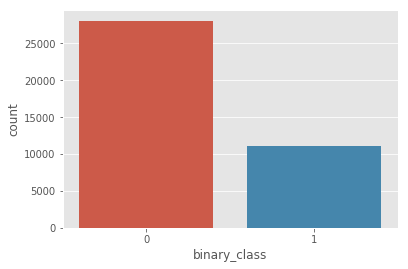

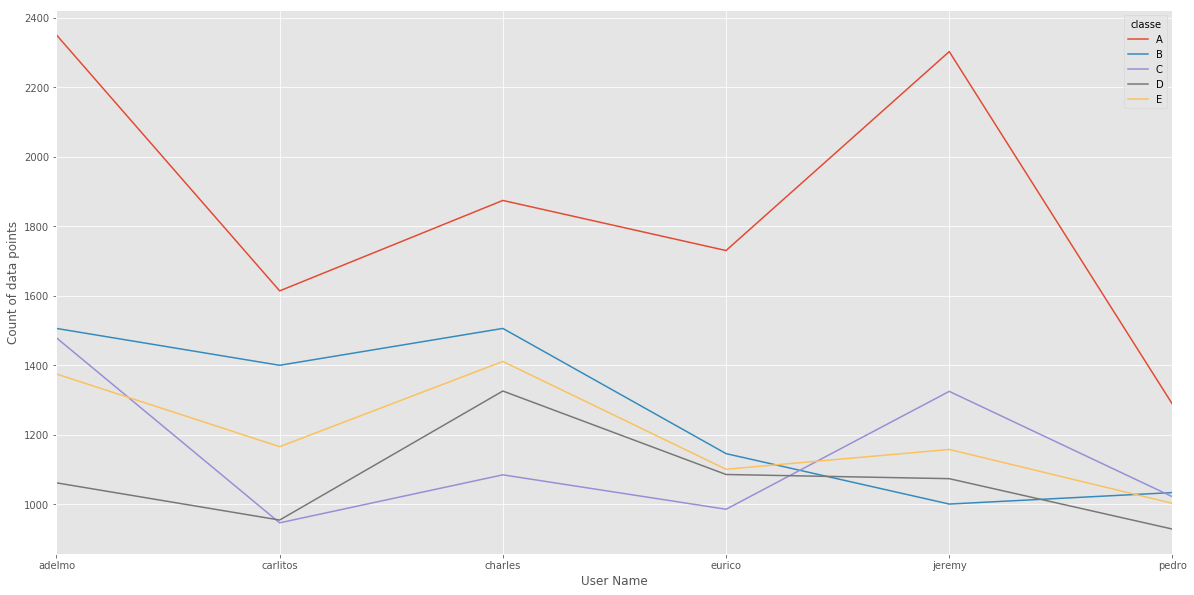

In [281]:
#6 men
#A, B, C, D, E classes
# A (11K) vs the rest (28k)

#a dummy classifier that votes majority class would be 28k/(11k+28k) 72%

sns.countplot(x="classe", data=df)
sns.countplot(x="binary_class", data=df)
#sns.jointplot(x=x, y=y, kind="hex", color="k");

#balanced by users
df.user_name.value_counts()


fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['user_name','classe']).count()['raw_timestamp_part_2'].unstack().plot(ax=ax)
ax.set_xlabel('User Name')
ax.set_ylabel('Count of data points')

In [282]:
df = df.dropna() #drop the few rows where there was a nan

<a id='random_splits'></a>
### Modeling by random train/test split


In [283]:
#slice out the training and target data at random across all people and all classes, then create the train test split for the binary and multi class cases

from sklearn.model_selection import train_test_split
X=df.loc[:, 'num_window':'magnet_forearm_z']
y=df['binary_class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)

#Creating the dependent variable class
factor = pd.factorize(df['classe'])
print(factor[0])
definitions = factor[1]
#print(dataset.species.head())
print(definitions)
df['factor']=factor[0]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X,df.factor,test_size=0.3, stratify=y,random_state=42)

[0 0 0 ... 0 0 0]
Index(['E', 'A', 'D', 'B', 'C'], dtype='object')


In [284]:
def classification_and_results(X_train, y_train,X_test,y_test, clf_object, multiclass):
    """
    function to fit a classifier, given the object and data, 
    then print results and plot an ROC curve for the binary case
    returns nothing
    """
    clf_object.fit(X_train, y_train)
    y_pred=clf_object.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    
    if multiclass:
        print("Precision {0}\n Recall {1}\n F1 Score {2}".format(precision_score(y_test, y_pred,average=None), recall_score(y_test, y_pred,average=None), f1_score(y_test, y_pred,average=None)))
        print("\nResults on the training data:")
        y_pred=clf_object.predict(X_train)
        print(confusion_matrix(y_train, y_pred))
        print("Precision {0}\n Recall {1}\n F1 Score {2}".format(precision_score(y_train, y_pred,average=None), recall_score(y_train, y_pred,average=None), f1_score(y_train, y_pred,average=None)))
                  
        
    else:
        print("Precision {0}\n Recall {1}\n F1 Score {2}".format(precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
        fpr, tpr, thresholds=roc_curve(y_test, y_pred)
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right")
        plt.show()
        print("\nResults on the training data:")
        y_pred=clf_object.predict(X_train)
        print(confusion_matrix(y_train, y_pred))
        print("Precision {0}\n Recall {1}\n F1 Score {2}".format(precision_score(y_train, y_pred), recall_score(y_train, y_pred), f1_score(y_train, y_pred)))

<a id='random'></a>
### Random Split train and test data using Logistic Regression and Random Forest

Random Split train and test data using Logistic Regression and Random Forest
Binary and multiclass

[[7961  464]
 [ 669 2679]]
Precision 0.8523703468024181
 Recall 0.8001792114695341
 F1 Score 0.8254506239408411


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


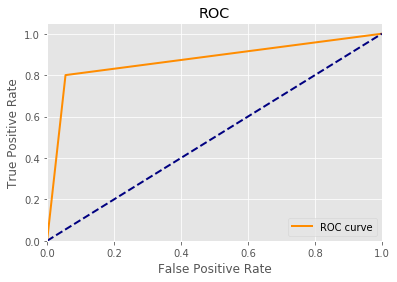


Results on the training data:
[[18538  1120]
 [ 1561  6249]]
Precision 0.8480119419188492
 Recall 0.8001280409731114
 F1 Score 0.8233743988405033


In [285]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=4000)# no difference w/ class_weight = 'balanced')
classification_and_results(X_train, y_train,X_test,y_test, lr, False)

[[8424    1]
 [   0 3348]]
Precision 0.9997014034040012
 Recall 1.0
 F1 Score 0.9998506794086904


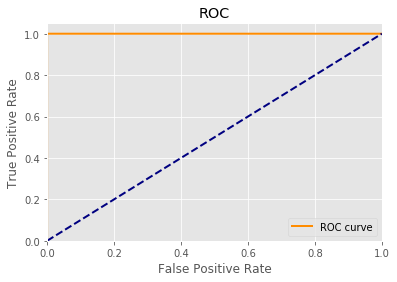


Results on the training data:
[[19658     0]
 [    0  7810]]
Precision 1.0
 Recall 1.0
 F1 Score 1.0


In [286]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

classification_and_results(X_train, y_train,X_test,y_test, rf, False)

#RF - experiemented with reducing the estimators and depth to check if the score would reduce and overfit is a problem. This code is commented out and results in the summary
# print(rf)

# rf = RandomForestClassifier(n_estimators=10, max_depth=5)
# classification_and_results(X_train, y_train,X_test,y_test, rf, False)

<a id='random_results'></a>
#### Results for binary classification using random train/test split
- Very good results but because the training data includes everyone that also appear in the test set, then these models will not generalize well to a person never seen before.



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-wp0w{text-decoration:underline;border-color:#333333;text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-ghkv{font-family:Tahoma, Geneva, sans-serif !important;;border-color:#333333;text-align:left;vertical-align:top}
.tg .tg-de2y{border-color:#333333;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt" td style="text-align: center;" colspan="8"><span style="font-weight:bold">Binary</span> model results (F1 score rounded)</th>
  </tr>
  <tr>
    <td class="tg-7btt" td style="text-align: center;" colspan="8">Random Test/Train all people &amp; classes</td>
  </tr>
  <tr>
    <td class="tg-wp0w">Model</td>
    <td class="tg-wp0w">Test</td>
    <td class="tg-wp0w">Train</td>
    <td class="tg-wp0w">Model</td>
    <td class="tg-wp0w">Test</td>
    <td class="tg-wp0w" colspan="3">Train</td>
  </tr>
  <tr>
    <td class="tg-ghkv">Log Regression</td>
    <td class="tg-de2y">0.826</td>
    <td class="tg-de2y">0.823</td>
    <td class="tg-ghkv">Random Forest</td>
    <td class="tg-de2y">0.9999</td>
    <td class="tg-de2y" colspan="3">1.0</td>
  </tr>
</table>

For comparison, multiclassification on the same random split of test/train is below.

In [287]:
#uses a one vs all, that is, 5 binary classifiers
lrm = LogisticRegression(multi_class="multinomial", solver="lbfgs") #no difference with class_weight = 'balanced')
classification_and_results(X_train_m, y_train_m,X_test_m,y_test_m, lrm, True)

[[1252  160  220  322  198]
 [  64 2774  178  171  161]
 [ 129  158 1252  146  257]
 [ 181  309  108 1426  218]
 [ 111  232  197  235 1314]]
Precision [0.72078296 0.76355629 0.64040921 0.62       0.61173184]
 Recall [0.58178439 0.82855436 0.64469619 0.63603925 0.6290091 ]
 F1 Score [0.64386732 0.79472855 0.64254555 0.62791722 0.62025018]

Results on the training data:
[[2883  393  548  758  480]
 [ 147 6493  396  398  376]
 [ 321  413 2874  312  570]
 [ 513  735  220 3374  509]
 [ 247  550  443  490 3025]]
Precision [0.70128922 0.75640727 0.64137469 0.6327832  0.60987903]
 Recall [0.56953773 0.83137004 0.64008909 0.63053635 0.63617245]
 F1 Score [0.62858389 0.79211907 0.64073125 0.63165777 0.62274833]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [288]:
rf = RandomForestClassifier(n_estimators=100)

classification_and_results(X_train_m, y_train_m,X_test_m,y_test_m, rf, True)

# rf = RandomForestClassifier(n_estimators=10, max_depth=5)

# classification_and_results(X_train_m, y_train_m,X_test_m,y_test_m, rf, True)


[[2151    0    1    0    0]
 [   0 3348    0    0    0]
 [   2    0 1938    0    2]
 [   0    1    0 2239    2]
 [   0    0    0    3 2086]]
Precision [0.99907106 0.9997014  0.99948427 0.99866191 0.99808612]
 Recall [0.99953532 1.         0.99794027 0.99866191 0.99856391]
 F1 Score [0.99930314 0.99985068 0.99871167 0.99866191 0.99832496]

Results on the training data:
[[5062    0    0    0    0]
 [   0 7810    0    0    0]
 [   0    0 4490    0    0]
 [   0    0    0 5351    0]
 [   0    0    0    0 4755]]
Precision [1. 1. 1. 1. 1.]
 Recall [1. 1. 1. 1. 1.]
 F1 Score [1. 1. 1. 1. 1.]


<a id='random_results_m'></a>
#### Results for multiclass classification using random train/test split
- Logistic regression has a decent result v.s. by chance, and Random Forest worked almost perfectly on the test and perfectly on the training, but again, these models have been trained on everyone that also appear in the test set.



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-he1u{text-decoration:underline;border-color:#333333;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-if35{text-decoration:underline;text-align:center;vertical-align:top}
.tg .tg-de2y{border-color:#333333;text-align:left;vertical-align:top}
.tg .tg-ghkv{font-family:Tahoma, Geneva, sans-serif !important;;border-color:#333333;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt" td style="text-align: center;" colspan="6"><span style="font-weight:bold">Multiclass</span> model results (F1 score rounded)</th>
  </tr>
  <tr>
    <td class="tg-7btt" td style="text-align: center;" colspan="6">Random Test/Train all people &amp; classes</td>
  </tr>
  <tr>
    <td class="tg-if35" td style="text-align: center;" colspan="6">Logistic Regression (Multinomial)</td>
  </tr>
  <tr>
    <td class="tg-de2y">Class</td>
    <td class="tg-he1u">A</td>
    <td class="tg-he1u">B</td>
    <td class="tg-he1u">C</td>
    <td class="tg-he1u">D</td>
    <td class="tg-he1u">E</td>
  </tr>
  <tr>
    <td class="tg-ghkv">Test</td>
    <td class="tg-de2y">0.644</td>
    <td class="tg-de2y">0.795</td>
    <td class="tg-ghkv">0.643</td>
    <td class="tg-de2y">0.628</td>
    <td class="tg-de2y">0.620</td>
  </tr>
  <tr>
    <td class="tg-0lax">Train</td>
    <td class="tg-0lax">0.629</td>
    <td class="tg-0lax">0.792</td>
    <td class="tg-0lax">0.641</td>
    <td class="tg-0lax">0.632</td>
    <td class="tg-0lax">0.623</td>
  </tr>
  <tr>
    <td class="tg-if35" td style="text-align: center;" colspan="6">Random Forest</td>
  </tr>
  <tr>
    <td class="tg-0lax">Class</td>
    <td class="tg-if35">A</td>
    <td class="tg-if35">B</td>
    <td class="tg-if35">C</td>
    <td class="tg-if35">D</td>
    <td class="tg-if35">E</td>
  </tr>
  <tr>
    <td class="tg-0lax">Test</td>
    <td class="tg-0lax">0.999</td>
    <td class="tg-0lax">0.9998</td>
    <td class="tg-0lax">0.998</td>
    <td class="tg-0lax">0.999</td>
    <td class="tg-0lax">0.998</td>
  </tr>
  <tr>
    <td class="tg-0lax">Train</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
  </tr>
</table>


<a id='people_split'></a>
### Modeling by seperating out participants, seen vs unseen

In [289]:
#choose users by speed to complete
test_users=['charles', 'eurico']
train_users=['adelmo', 'jeremy', 'pedro','carlitos']#

df_train=df.loc[df['user_name'].isin(train_users)]
df_test=df.loc[df['user_name'].isin(test_users)]

X_train=df_train[features]
y_train=df_train['binary_class']
y_train_m=df_train['classe']
X_test=df_test[features]
y_test=df_test['binary_class']
y_test_m=df_test['classe']

In [290]:

df.user_name.value_counts()

adelmo      7772
charles     7202
jeremy      6860
carlitos    6082
eurico      6049
pedro       5276
Name: user_name, dtype: int64

Results for binary logistic regression:
[[5767 3880]
 [ 328 3276]]
Precision 0.4577976523197317
 Recall 0.9089900110987791
 F1 Score 0.6089219330855019


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


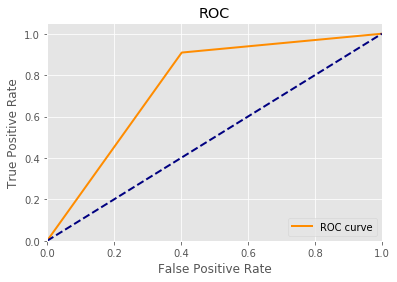


Results on the training data:
[[17578   858]
 [ 1030  6524]]
Precision 0.8837713356813871
 Recall 0.8636483981996294
 F1 Score 0.8735940010712372


In [291]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=4000)
print("Results for binary logistic regression:")
classification_and_results(X_train, y_train,X_test,y_test, lr, False)


Results using RandomForestClassifier for binary:
[[9581   66]
 [3436  168]]
Precision 0.717948717948718
 Recall 0.04661487236403995
 F1 Score 0.08754559666492966


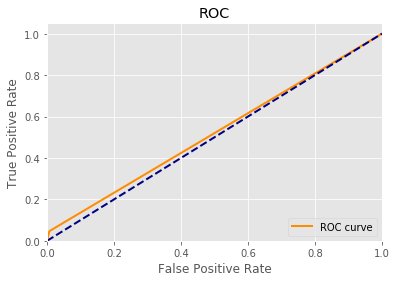


Results on the training data:
[[18436     0]
 [    0  7554]]
Precision 1.0
 Recall 1.0
 F1 Score 1.0


In [292]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
print("Results using RandomForestClassifier for binary:")
classification_and_results(X_train, y_train,X_test,y_test, rf, False)

#these results are much lower than expect, do not make sense compared to the rest, will keep trying to debug and make sure there is no mistake

# rf = RandomForestClassifier(n_estimators=10, max_depth=5)
# classification_and_results(X_train, y_train,X_test,y_test, rf, False)

In [293]:
lrm = LogisticRegression(multi_class="multinomial", solver="lbfgs") #no difference with class_weight = 'balanced')
classification_and_results(X_train, y_train_m,X_test,y_test_m, lrm, True)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[2540    0  183  356  525]
 [1826   15  139  194  478]
 [1381    8   53  264  365]
 [1656   32  148  243  333]
 [1605    0   21   95  791]]
Precision [0.28197158 0.27272727 0.09742647 0.2109375  0.31741573]
 Recall [0.70477248 0.00565611 0.0255915  0.10074627 0.31488854]
 F1 Score [0.40279099 0.01108238 0.04053537 0.13636364 0.31614708]

Results on the training data:
[[6451  332  352  388   31]
 [ 702 3196  535   90  418]
 [ 436  539 3395  245  158]
 [ 353  135  601 2875   56]
 [ 200  732  498  417 2855]]
Precision [0.79231147 0.6477503  0.63092362 0.71606476 0.81154065]
 Recall [0.85398464 0.64683262 0.71129269 0.71517413 0.60718843]
 F1 Score [0.82199286 0.64729114 0.66870199 0.71561917 0.6946472 ]


In [294]:
rf = RandomForestClassifier(n_estimators=100)

classification_and_results(X_train, y_train_m,X_test,y_test_m, rf, True)

[[1306  419    0  250 1629]
 [ 233 1166    0  111 1142]
 [ 183  676    0  226  986]
 [ 576  596    0  161 1079]
 [  85   24    0    0 2403]]
Precision [0.54804868 0.40472058 0.         0.21524064 0.33195193]
 Recall [0.36237514 0.43966817 0.         0.06674959 0.95660828]
 F1 Score [0.4362786  0.42147117 0.         0.10189873 0.49287253]

Results on the training data:


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[7554    0    0    0    0]
 [   0 4941    0    0    0]
 [   0    0 4773    0    0]
 [   0    0    0 4020    0]
 [   0    0    0    0 4702]]
Precision [1. 1. 1. 1. 1.]
 Recall [1. 1. 1. 1. 1.]
 F1 Score [1. 1. 1. 1. 1.]


<a id='people_results'></a>
#### Results for binary and multiclass classification using different participants in the train and test set

- Please note that the F1 scores in the tables are not exactly reproduceable due to more than one possible solution the models come up with when ran.
<table>
<tbody>
<tr>
<th td style="text-align: center;" colspan="8">Binary model results (F1 score rounded)</th>
</tr>
<tr>
<td style="text-align: center;" colspan="8">Different participants in the test/train set</td>
</tr>
<tr>
<td>Model</td>
<td>Test</td>
<td>Train</td>
<td>Model</td>
<td>Test</td>
<td colspan="3">Train</td>
</tr>
<tr>
<td style="text-align: center;">Log Regression</td>
<td>0.609</td>
<td>0.873</td>
<td style="text-align: center;">Random Forest</td>
<td>0.024*</td>
<td colspan="3">1.0</td>
</tr>
</tbody>
</table>

<br>
 As expected the F1 scores are lower when training and testing on different participants. Note: the F1 train score of .037 for Random Forest is unusually low. I either have not caught a bug in my code or something went haywire.  Random Forest was fine for the multinomial case as seen in the table below.

<br>
 
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-he1u{text-decoration:underline;border-color:#333333;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-t2cw{font-weight:bold;text-decoration:underline;text-align:center;vertical-align:top}
.tg .tg-de2y{border-color:#333333;text-align:left;vertical-align:top}
.tg .tg-ghkv{font-family:Tahoma, Geneva, sans-serif !important;;border-color:#333333;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-if35{text-decoration:underline;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt"td style="text-align: center;" colspan="6">Multiclass model results (F1 score rounded)</th>
  </tr>
  <tr>
    <td class="tg-7btt" td style="text-align: center;" colspan="6">Different participants in train/test set</td>
  </tr>
  <tr>
    <td class="tg-t2cw" td style="text-align: center;" colspan="6">Logistic Regression (Multinomial)</td>
  </tr>
  <tr>
    <td class="tg-de2y">Class</td>
    <td class="tg-he1u">A</td>
    <td class="tg-he1u">B</td>
    <td class="tg-he1u">C</td>
    <td class="tg-he1u">D</td>
    <td class="tg-he1u">E</td>
  </tr>
  <tr>
    <td class="tg-ghkv">Test</td>
    <td class="tg-de2y">0.467</td>
    <td class="tg-de2y">0.207</td>
    <td class="tg-ghkv">0.385</td>
    <td class="tg-de2y">0.022</td>
    <td class="tg-de2y">0.378</td>
  </tr>
  <tr>
    <td class="tg-0lax">Train</td>
    <td class="tg-0lax">0.813</td>
    <td class="tg-0lax">0.746</td>
    <td class="tg-0lax">0.606</td>
    <td class="tg-0lax">0.740</td>
    <td class="tg-0lax">0.832</td>
  </tr>
  <tr>
    <td class="tg-t2cw" td style="text-align: center;" colspan="6">Random Forest</td>
  </tr>
  <tr>
    <td class="tg-0lax">Class</td>
    <td class="tg-if35">A</td>
    <td class="tg-if35">B</td>
    <td class="tg-if35">C</td>
    <td class="tg-if35">D</td>
    <td class="tg-if35">E</td>
  </tr>
  <tr>
    <td class="tg-0lax">Test</td>
    <td class="tg-0lax">0.414</td>
    <td class="tg-0lax">0.428</td>
    <td class="tg-0lax">0.0</td>
    <td class="tg-0lax">0.096</td>
    <td class="tg-0lax">0.488</td>

  </tr>
  <tr>
    <td class="tg-0lax">Train</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
  </tr>
</table>

<br>
Logistic Regression performance is worse on the test data of never seen participants. Random Forest did much worse, by comparison to the above results on the random test/train, though the same score of 1 on the training data.  Now is the situation of Random Forest overfitting on the training data.

Window time and lag features, as the researchers and authors of the papers performed, are going to be generated next.  The goal is to help generalize and smooth out the patterns in the data collected and I believe the class of movement depends on its previous values.

<a id='feature_eng'></a>
## Feature Engineering and domain knowledge 


I am feature engineering by looking at the graphs, and using my domain knowledge of strength movements to figure out which time features could be helpful.  The other option is to use a deep learning time model, but I need a lot of data.  In this case, I am going to go with trying some window and lag features and see what happens.

See the appendix for the time series plots of the features for each participant and class.  The code to generate them is there, and a folder in this repo has the png files.

My observations:

- Class E - pitch belt and somewhat roll belt has cyclical movement with the arm/dumbell vs -  Class A where belt does not.
- Class B (elbow front) - some of the forearm measurements had wavy cycle action that Class A did not have
- Class C - some magnet and dumbell measurements have less or not much wave vs Class A, 
- Class D some Z direction measurements were more wavy

Cyclical vs not Cyclical is what I see mostly to capture. I see no obvious trending, whichis expected as these are repeated movement patterns.  Also expected, different people performing the same class do not appear the same. I assume due to variations of how fast the movement was performed, how long a persons arms, forearm and height is.  Windowing will remove the variation of the unique person.   


<a id='window_lag'></a>
### Window and Lag features
- Window Features are the summary of values over a fixed window of prior time steps.
- Lag Features are values at prior time steps.
- - The first set of rows, equal to the amount of lag, will not have a value.  This situation can be handled by imputing the lag values or truncating these rows. Since ten reps of the movement are performed, and usually there is a few seconds of start up time, I choose to truncate the rows.


In [295]:
df.sort_index(inplace=True)
#df[features].rolling(window=80).mean()
addl_features=[]

for f in features:
    addf_mean="{0}_mean2s".format(f)
    addf_min="{0}_min2s".format(f)
    addf_max="{0}_max2s".format(f)
    addf_var="{0}_var2s".format(f)
    addf_lag="{0}_lag2s".format(f)
    #print(addf)
    df[addf_mean] = df[f].rolling(window=80).mean()
    df[addf_min] = df[f].rolling(window=80).max()
    df[addf_max] = df[f].rolling(window=80).min()
    df[addf_var] = df[f].rolling(window=80).var()
    df[addf_lag] = df[f].shift(periods=80)
    addl_features.append(addf_mean)
    addl_features.append(addf_max)
    addl_features.append(addf_min)
    addl_features.append(addf_var)
    addl_features.append(addf_lag)
    


In [296]:
print(df.shape)
#Drop rows with NA from the rolling window and shifts
df=df.dropna()  
print(df.shape)
#split the train and test the same way, with these new window/lag features
all_features=features+addl_features
df_train=df.loc[df['user_name'].isin(train_users)]
df_test=df.loc[df['user_name'].isin(test_users)]

X_train=df_train[all_features]
y_train=df_train['binary_class']
y_train_m=df_train['classe']
X_test=df_test[all_features]
y_test=df_test['binary_class']
y_test_m=df_test['classe']

(39241, 327)
(39161, 327)



I wanted to see how the models compare using all of the features before attempting a feature reduction.

Results for binary logistic regression:
[[7693 1954]
 [1277 2247]]
Precision 0.5348726493691978
 Recall 0.637627695800227
 F1 Score 0.5817475728155339


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


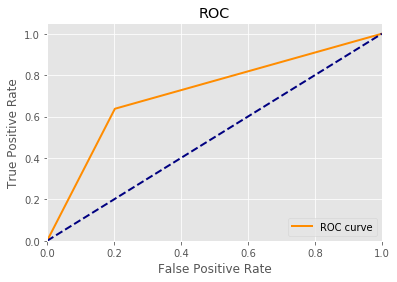


Results on the training data:
[[18412    24]
 [   40  7514]]
Precision 0.9968161315998939
 Recall 0.9947047921630924
 F1 Score 0.9957593426981182


In [297]:
lr = LogisticRegression(solver='lbfgs', max_iter=4000)
print("Results for binary logistic regression:")
classification_and_results(X_train, y_train,X_test,y_test, lr, False)

[[9487  160]
 [2461 1063]]
Precision 0.8691741618969746
 Recall 0.30164585698070373
 F1 Score 0.44786180745734144


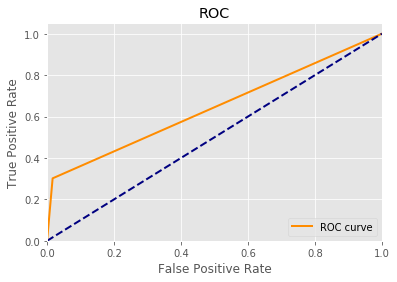


Results on the training data:
[[18436     0]
 [    0  7554]]
Precision 1.0
 Recall 1.0
 F1 Score 1.0


In [298]:
rf = RandomForestClassifier(n_estimators=100)
classification_and_results(X_train, y_train,X_test,y_test, rf, False)

# rf = RandomForestClassifier(n_estimators=10, max_depth=5)
# classification_and_results(X_train, y_train,X_test,y_test, rf, False)


In [299]:
lrm = LogisticRegression(multi_class="multinomial", solver="lbfgs") #no difference with class_weight = 'balanced')
classification_and_results(X_train, y_train_m,X_test,y_test_m, lrm, True)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[2106  231  994  132   61]
 [1023  412 1021  108   88]
 [ 669   88 1138  176    0]
 [ 707  429  495   35  746]
 [ 997  161  195  366  793]]
Precision [0.3827699  0.31188494 0.29612282 0.04283966 0.46978673]
 Recall [0.59761635 0.15535445 0.549493   0.01451078 0.31568471]
 F1 Score [0.46665189 0.20739995 0.38484951 0.02167854 0.37761905]

Results on the training data:
[[6515  156  652  143   88]
 [ 773 3506  356   23  283]
 [ 729  481 2851  524  188]
 [ 292   95  597 2950   86]
 [ 169  222  186  315 3810]]
Precision [0.76845954 0.78609865 0.61417492 0.74589128 0.85521886]
 Recall [0.86245698 0.70957296 0.59731825 0.73383085 0.81029349]
 F1 Score [0.8127495  0.7458781  0.60562931 0.73981191 0.83215027]


In [300]:
rf = RandomForestClassifier(n_estimators=100)

classification_and_results(X_train, y_train_m,X_test,y_test_m, rf, True)
# rf = RandomForestClassifier(n_estimators=10, max_depth=5)
# classification_and_results(X_train, y_train_m,X_test,y_test_m, rf, True)

[[2190  869  292   77   96]
 [ 147 2335    0   93   77]
 [ 241 1253  195  382    0]
 [ 650   20   10  664 1068]
 [ 125  878    0   79 1430]]
Precision [0.65314644 0.43604108 0.39235412 0.51274131 0.53538001]
 Recall [0.62145289 0.88046757 0.09415741 0.27529022 0.56926752]
 F1 Score [0.63690563 0.58323967 0.15186916 0.35824117 0.55180397]

Results on the training data:
[[7554    0    0    0    0]
 [   0 4941    0    0    0]
 [   0    0 4773    0    0]
 [   0    0    0 4020    0]
 [   0    0    0    0 4702]]
Precision [1. 1. 1. 1. 1.]
 Recall [1. 1. 1. 1. 1.]
 F1 Score [1. 1. 1. 1. 1.]


<a id='window_lag_results'></a>
### Results modeling on the original and additional window and lag features
<table>
<tbody>
<tr>
<th td style="text-align: center;" colspan="8">Binary model results (F1 score rounded)</th>
</tr>
<tr>
<td style="text-align: center;" colspan="8">Window and Lag features</td>
</tr>
<tr>
<td>Model</td>
<td>Test</td>
<td>Train</td>
<td>Model</td>
<td>Test</td>
<td colspan="3">Train</td>
</tr>
<tr>
<td style="text-align: center;">Log Regression</td>
<td>0.58</td>
<td>0.996</td>
<td style="text-align: center;">Random Forest</td>
<td>0.496</td>
<td colspan="3">1.0</td>
</tr>
</tbody>
</table>

<br>
The test scores went down for both logisitic regression and random forest binary classification models.  All of the extra features in the binary case seem to have been overkill and lost generalizating to the unseen participants.


<br>
 
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-he1u{text-decoration:underline;border-color:#333333;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-t2cw{font-weight:bold;text-decoration:underline;text-align:center;vertical-align:top}
.tg .tg-de2y{border-color:#333333;text-align:left;vertical-align:top}
.tg .tg-ghkv{font-family:Tahoma, Geneva, sans-serif !important;;border-color:#333333;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-if35{text-decoration:underline;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt"td style="text-align: center;" colspan="6">Multiclass model results (F1 score rounded)</th>
  </tr>
  <tr>
    <td class="tg-7btt" td style="text-align: center;" colspan="6">Different participants in train/test set</td>
  </tr>
  <tr>
    <td class="tg-t2cw" td style="text-align: center;" colspan="6">Logistic Regression (Multinomial)</td>
  </tr>
  <tr>
    <td class="tg-de2y">Class</td>
    <td class="tg-he1u">A</td>
    <td class="tg-he1u">B</td>
    <td class="tg-he1u">C</td>
    <td class="tg-he1u">D</td>
    <td class="tg-he1u">E</td>
  </tr>
  <tr>
    <td class="tg-ghkv">Test</td>
    <td class="tg-de2y">0.459</td>
    <td class="tg-de2y">0.207</td>
    <td class="tg-ghkv">0.386</td>
    <td class="tg-de2y">0.022</td>
    <td class="tg-de2y">0.378</td>
      
      
  </tr>
  <tr>
    <td class="tg-0lax">Train</td>
    <td class="tg-0lax">0.813</td>
    <td class="tg-0lax">0.746</td>
    <td class="tg-0lax">0.606</td>
    <td class="tg-0lax">0.740</td>
    <td class="tg-0lax">0.832</td>
  </tr>
  <tr>
    <td class="tg-t2cw" td style="text-align: center;" colspan="6">Random Forest</td>
  </tr>
  <tr>
    <td class="tg-0lax">Class</td>
    <td class="tg-if35">A</td>
    <td class="tg-if35">B</td>
    <td class="tg-if35">C</td>
    <td class="tg-if35">D</td>
    <td class="tg-if35">E</td>
  </tr>
  <tr>
    <td class="tg-0lax">Test</td>
    <td class="tg-0lax">0.637</td>
    <td class="tg-0lax">0.583</td>
    <td class="tg-0lax">0.152</td>
    <td class="tg-0lax">0.359</td>
    <td class="tg-0lax">0.552</td>

  </tr>
  <tr>
    <td class="tg-0lax">Train</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">1</td>
  </tr>
</table>

<br>

Random Forest did better on the test set in the multinomial case with the window and lag features than without them. But the results are still worse than by chance for Classes C,D and E.  Logistic regression did not improve with the extra features.
Below is an attempt to see if feature reduction will help improve the test scores.


In [304]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

print(feature_importances[:20])

                         importance
magnet_belt_z_max2s        0.023400
pitch_forearm_max2s        0.020651
num_window_max2s           0.020509
magnet_dumbbell_y_var2s    0.018955
magnet_belt_z_var2s        0.018275
gyros_dumbbell_y_var2s     0.016551
magnet_belt_y_var2s        0.016225
accel_belt_z_var2s         0.015763
gyros_belt_z_var2s         0.015459
roll_forearm_max2s         0.015177
magnet_dumbbell_y_min2s    0.014551
roll_belt_var2s            0.014096
accel_dumbbell_y_var2s     0.013609
gyros_belt_z_min2s         0.013533
magnet_belt_y_max2s        0.012321
gyros_belt_z_max2s         0.012305
magnet_arm_z_max2s         0.012087
num_window                 0.011419
accel_arm_z_var2s          0.009913
num_window_lag2s           0.009878


In [303]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.000001
sfm = SelectFromModel(rf, threshold=0.001)

# Train the selector
sfm.fit(X_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index])

num_window
roll_belt
pitch_belt
yaw_belt
roll_arm
yaw_arm
accel_dumbbell_x
accel_dumbbell_z
magnet_dumbbell_x
magnet_dumbbell_z
roll_forearm
pitch_forearm
magnet_forearm_x
num_window_mean2s
num_window_max2s
num_window_min2s
num_window_lag2s
roll_belt_mean2s
roll_belt_max2s
roll_belt_min2s
roll_belt_var2s
pitch_belt_mean2s
pitch_belt_max2s
pitch_belt_min2s
pitch_belt_var2s
pitch_belt_lag2s
yaw_belt_mean2s
yaw_belt_max2s
yaw_belt_min2s
yaw_belt_var2s
yaw_belt_lag2s
total_accel_belt_mean2s
total_accel_belt_max2s
total_accel_belt_var2s
gyros_belt_x_max2s
gyros_belt_x_min2s
gyros_belt_y_var2s
gyros_belt_z_max2s
gyros_belt_z_min2s
gyros_belt_z_var2s
accel_belt_x_mean2s
accel_belt_x_max2s
accel_belt_x_min2s
accel_belt_x_var2s
accel_belt_y_mean2s
accel_belt_y_var2s
accel_belt_z_mean2s
accel_belt_z_max2s
accel_belt_z_var2s
magnet_belt_x_mean2s
magnet_belt_x_max2s
magnet_belt_x_lag2s
magnet_belt_y_mean2s
magnet_belt_y_max2s
magnet_belt_y_min2s
magnet_belt_z_mean2s
magnet_belt_z_max2s
magnet_belt

In [305]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)


classification_and_results(X_important_train, y_train_m,X_important_test,y_test_m, rf, True)


[[2044  735  272  194  279]
 [ 133 1402    0  110 1007]
 [ 287  694  523  485   82]
 [ 698   12   12  628 1062]
 [ 114  343   24   39 1992]]
Precision [0.62393162 0.44005022 0.62936221 0.43131868 0.4504749 ]
 Recall [0.5800227  0.52865762 0.25253501 0.26036484 0.79299363]
 F1 Score [0.60117647 0.48030147 0.36044108 0.32471562 0.57456014]

Results on the training data:
[[7554    0    0    0    0]
 [   0 4941    0    0    0]
 [   0    0 4773    0    0]
 [   0    0    0 4020    0]
 [   0    0    0    0 4702]]
Precision [1. 1. 1. 1. 1.]
 Recall [1. 1. 1. 1. 1.]
 F1 Score [1. 1. 1. 1. 1.]


## Leave 2 Participants out cross validation

After modeling with splitting the data, and adding in window/lag features, I will pick the window/lag random forest model to see how well it does with all combinations of 2 users being the test and the rest as the training.  Are these scores going to be consistent?

I have written a custom cv function to yield all possible combinations of indices of leaving two participants out.  This is passed as the `cv` parameter in the `cross_val_score` function.
Results below show the mean of the mean F1 scores is 0.413 and standard deviation is 0.07. Not too much variation in the leave 2 out participants test scores. 


In [306]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
def custom_cv_folds(df_series, p):
        unique_features=list(df_series.unique())
        for comb in combinations(iter(unique_features), p):
            train_indices=[]
            test_indices=[]
            train=[x for x in unique_features if x not in comb]
            dt_test_indices=df.index[df_series.isin(comb)].tolist()
            dt_train_indices=df.index[df_series.isin(train)].tolist()
            for i in dt_test_indices:
                test_indices.append(df.index.get_loc(i))
            for i in dt_train_indices:
                train_indices.append(df.index.get_loc(i))
#             print(comb)
#             print(np.array(test_indices))
#             print(np.array(train_indices))
            yield np.array(test_indices), np.array(train_indices) 


rf = RandomForestClassifier(n_estimators=100)
le=LabelEncoder()
le.fit(df['classe'])

y_tx = le.transform(df['classe'])
custom_cv = custom_cv_folds(df['user_name'], 2)

score_list=cross_val_score(rf, df[all_features], y_tx, cv=custom_cv, scoring='f1_weighted')
print(score_list)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.27128368 0.44004063 0.38818443 0.32972473 0.40049188 0.36821901
 0.48823363 0.42244133 0.5191854  0.33338273 0.39150195 0.55177735
 0.42765641 0.4012508  0.46127898]


In [309]:
#mean and std of the f1 weighted scores
print("mean and stdev of the scores from leave 2 out cv:")
print(np.mean(score_list),np.std(score_list))
orig_scores=[0.63690563, 0.58323967, 0.15186916, 0.35824117, 0.55180397]
print("mean of the f1 scores of each class = {0}".format(np.mean(orig_scores)))


mean and stdev of the scores from leave 2 out cv:
0.41297686349053103 0.07131881240980675
mean of the f1 scores of each class = 0.45641191999999997


<a id='summary'></a>
## Summary
I experimented with feature importance and selecting the top features for random forest.  The test scores were not as spectacular v.s. when all of the features were used.  There was not much difference if I set the threshold to .001 all the way down to 0.000001 for the feature importance.  Since tree splits occur on the feature that maximizes Information Gain, it is not surprising that using a reduced subset of features did not change the scores that much.

My work here shows that Random Forest performs best on the multinomal class when there are window and lag functions and performed the same with less features via feature reduction.  It is possible the results might not be considered too terrible, because an incorrect movement class more often got mistaken for a different incorrect class as opposed to the correct class.

I experimented with reducing the RF model complexity due to the 1.0 F1 scores on the training data to see how that would change the scores on the training and the testing.  The summary is that reducing the RF complexity can reduce the train score, but it equally reduces the test scores and they do not get balanced.  For example for the multinomial RF with window and lag features, the the test scores ranged from 0.3-0.6 and training scores were 1.0.  Using n_estimators=10, max_depth=5 the test scores went down to 0.1-0.6 for the test, and 0.83-0.97.

Finally, implementing a leave 2 participants out cross validation show relatively consistent lower than random chance test scores. By comparison, the paper authors implemented a leave one participant out cross validation to achieve a higher average score of 78.2%  but with one held out as a test set, there is more training data v.s. test data.

Another option is to spend time tuning the hyperparameters but I feel with this kind of data, and that many features, more data and deep learning is the way I would go.


<a id='appendix'></a>
# Appendix

## Time series plots



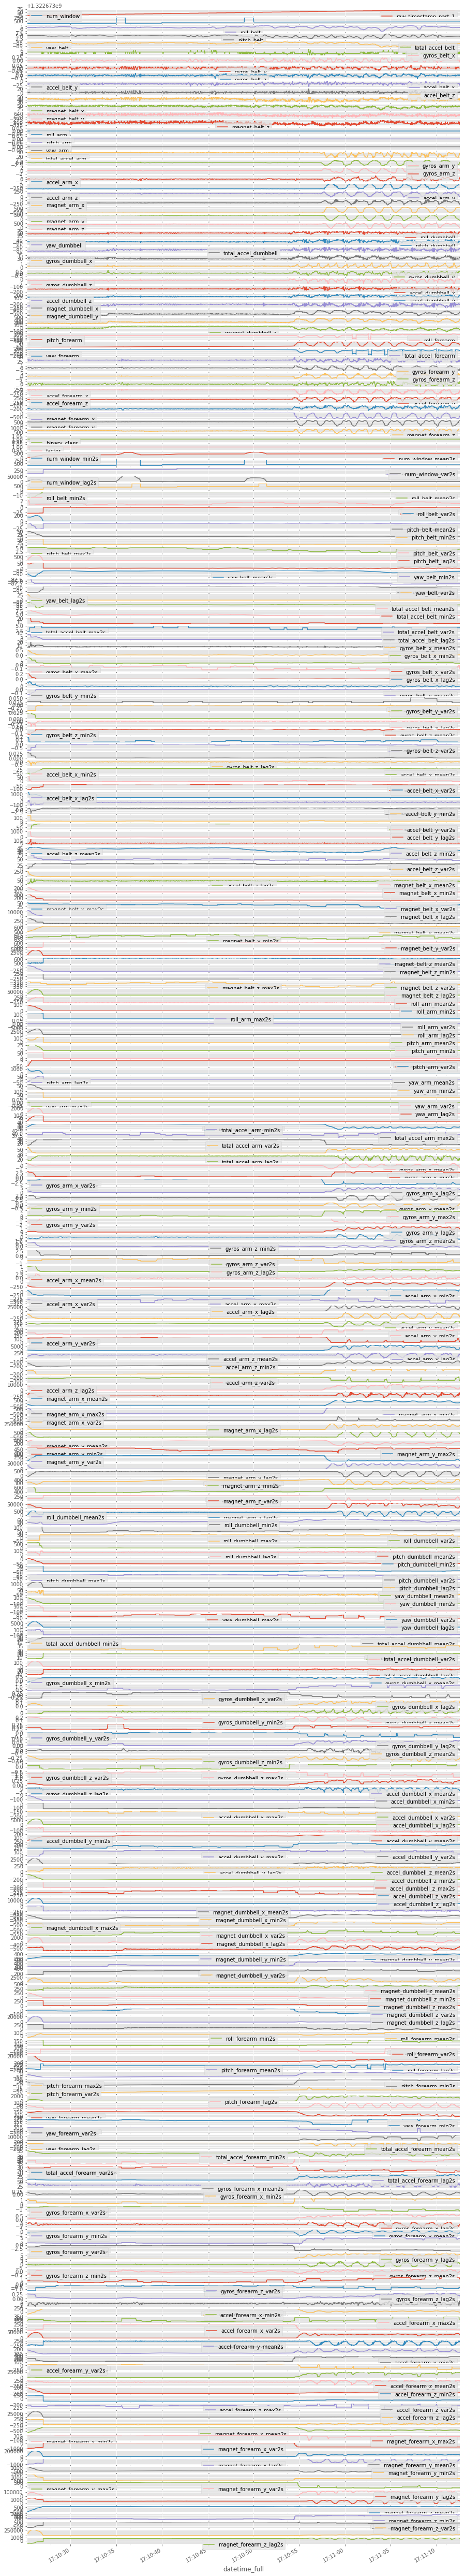

In [325]:
# fig, axes = plt.subplots(6, 5, figsize=(100,425))


# #loop through everyone and save the graphs -
# users=['adelmo', 'jeremy', 'pedro','carlitos','charles', 'eurico']
# classes=['A','B','C','D','E']

    
# for x,u in enumerate(users):
#     for y,c in enumerate(classes):
#         fn=u+c
#         df[(df['user_name'] == u) & (df['classe'] == c)].plot(subplots=True, sharex=True,             figsize=(15,85), ax=axes[x,y])

#Class A correct
df[(df['user_name'] == 'jeremy') & (df['classe'] == 'A')].plot(subplots=True, sharex=True, figsize=(15,100))#, #title="Jeremy - Class A (correct)")
plt.savefig('jeremyA.png')
plt.show()

#df['Consumption'].plot(linewidth=0.5);




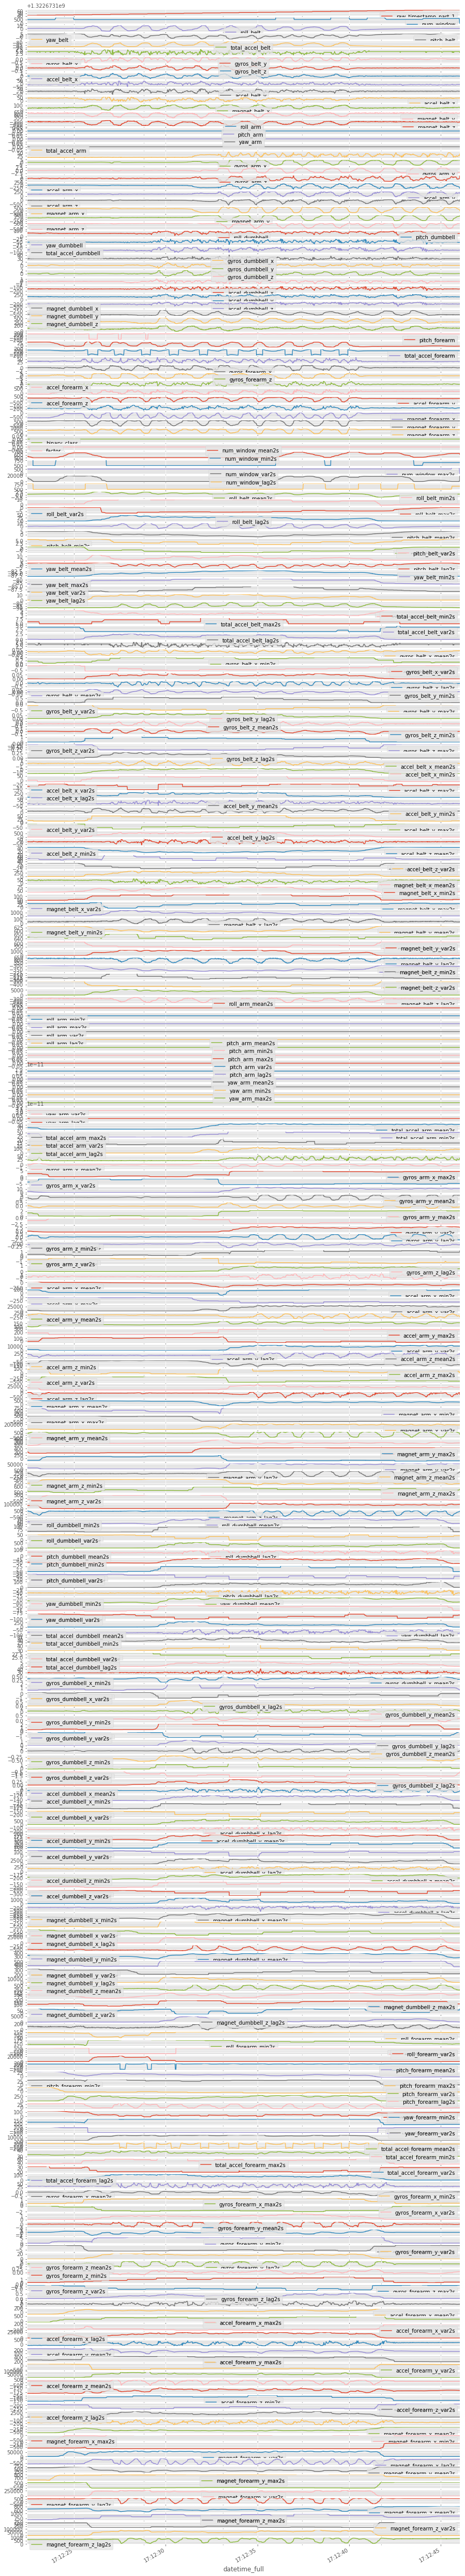

In [326]:
#Class E: throwing the hips to the front 
df[(df['user_name'] == 'jeremy') & (df['classe'] == 'E')].plot(subplots=True, sharex=True, figsize=(15,100))
plt.savefig('jeremyE.png')
plt.show()

In [367]:
    
# from sklearn.model_selection import GridSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 10000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)


# rf_random = GridSearchCV(estimator = rf, param_grid = random_grid,  cv = 3, verbose=2,  n_jobs = -1)
# rf_random.fit(X_train, y_train_m)
# rf_random.best_params_

In [328]:

# #loop through everyone and save the graphs - could put in the appendix
# users=['adelmo', 'jeremy', 'pedro','carlitos','charles', 'eurico']
# classes=['A','B','C','D','E']
# for u in users:
#     for c in classes:
#         df[(df['user_name'] == u) & (df['classe'] == c)].plot(subplots=True, sharex=True,             figsize=(15,85))
#         fn=u+c
# #         plt.savefig(fn+'.png')



In [ ]:
# in case I want to extend the class in the future
#LeavePOut
# from sklearn.model_selection import LeavePOut
# from itertools import combinations
    
# class LeavePFeatsOut(LeavePOut):

    
#     def __init__(self, feat_series, indices=None):
# #         super(LeavePOut, self).__init__(n, indices)
#         self.p = p
#         self.n=0
#         self.df_series=feat_series



#     def _iter_test_indices(self):
#         unique_features=list(self.df_series.unique())
#         for comb in combinations(iter(unique_features), self.p):
#             #train_indices=[]
#             test_indices=[]
#             print(comb)
#             #train=[x for x in users if x not in comb]
#         #     print("train")
#         #     print(train)
#             dt_test_indices=df.index[df['user_name'].isin(comb)].tolist()
#             #dt_train_indices=df.index[df['user_name'].isin(train)].tolist()
#             for i in dt_test_indices:
#                 test_indices.append(df.index.get_loc(i))
# #             for i in dt_train_indices:
# #                 train_indices.append(df.index.get_loc(i))
#             yield np.array(test_indices)    
    




In [ ]:
# attempted to use the tsfresh library.  I, instead, calculated my own window/lag features.
# from tsfresh import extract_relevant_features, extract_features

# #print(features)
# t_feats= ["user_name"] +features 

# master_df = pd.DataFrame({0: df_train[features][:5].values.flatten(),
#                           1: np.arange(5).repeat(df_train[features].shape[1])})
# print(master_df)
# print(master_df.dtypes)
# print(master_df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all()))
# print(df_train[features].apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all()))

#X = extract_features(master_df, column_id=1)

#extracted_features = extract_features(df_train[t_feats].head(100), column_id="user_name")

#extracted_features = extract_relevant_features(df_train[t_feats], y_train, column_id="user_name")#, column_kind="binary_class")

#check data types of the pandas columns.  If any are object if not expecting that. shaping can be tricky, and generate many features and need to filter that down to a small subset
# similiar to what I would get with the lag and rolling windows.
# pick the best to help me with my own rolling window and lag

# from tsfresh import select_features
# from tsfresh.utilities.dataframe_functions import impute

# impute(extracted_features)
# features_filtered = select_features(extracted_features, y)